In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import copy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_theme(font='Times New Roman', font_scale=1.2)
plt.rc("figure", autolayout=True)
# plot settings
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['axes.grid'] = False
# Chinese support
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## Data Visualization

In [3]:
def show(dataSet):
    color = ['r', 'g', 'b', 'c', 'k', 'm', 'w', 'y']
    mark = ['.', 'o', '^', '1', '8', 's', 'p', '*', 'h', '+', 'D']
    for i in range(dataSet.shape[0]):
        plt.scatter(dataSet[i][0], dataSet[i][1], \
                    c=color[dataSet[i][2].astype('int')])

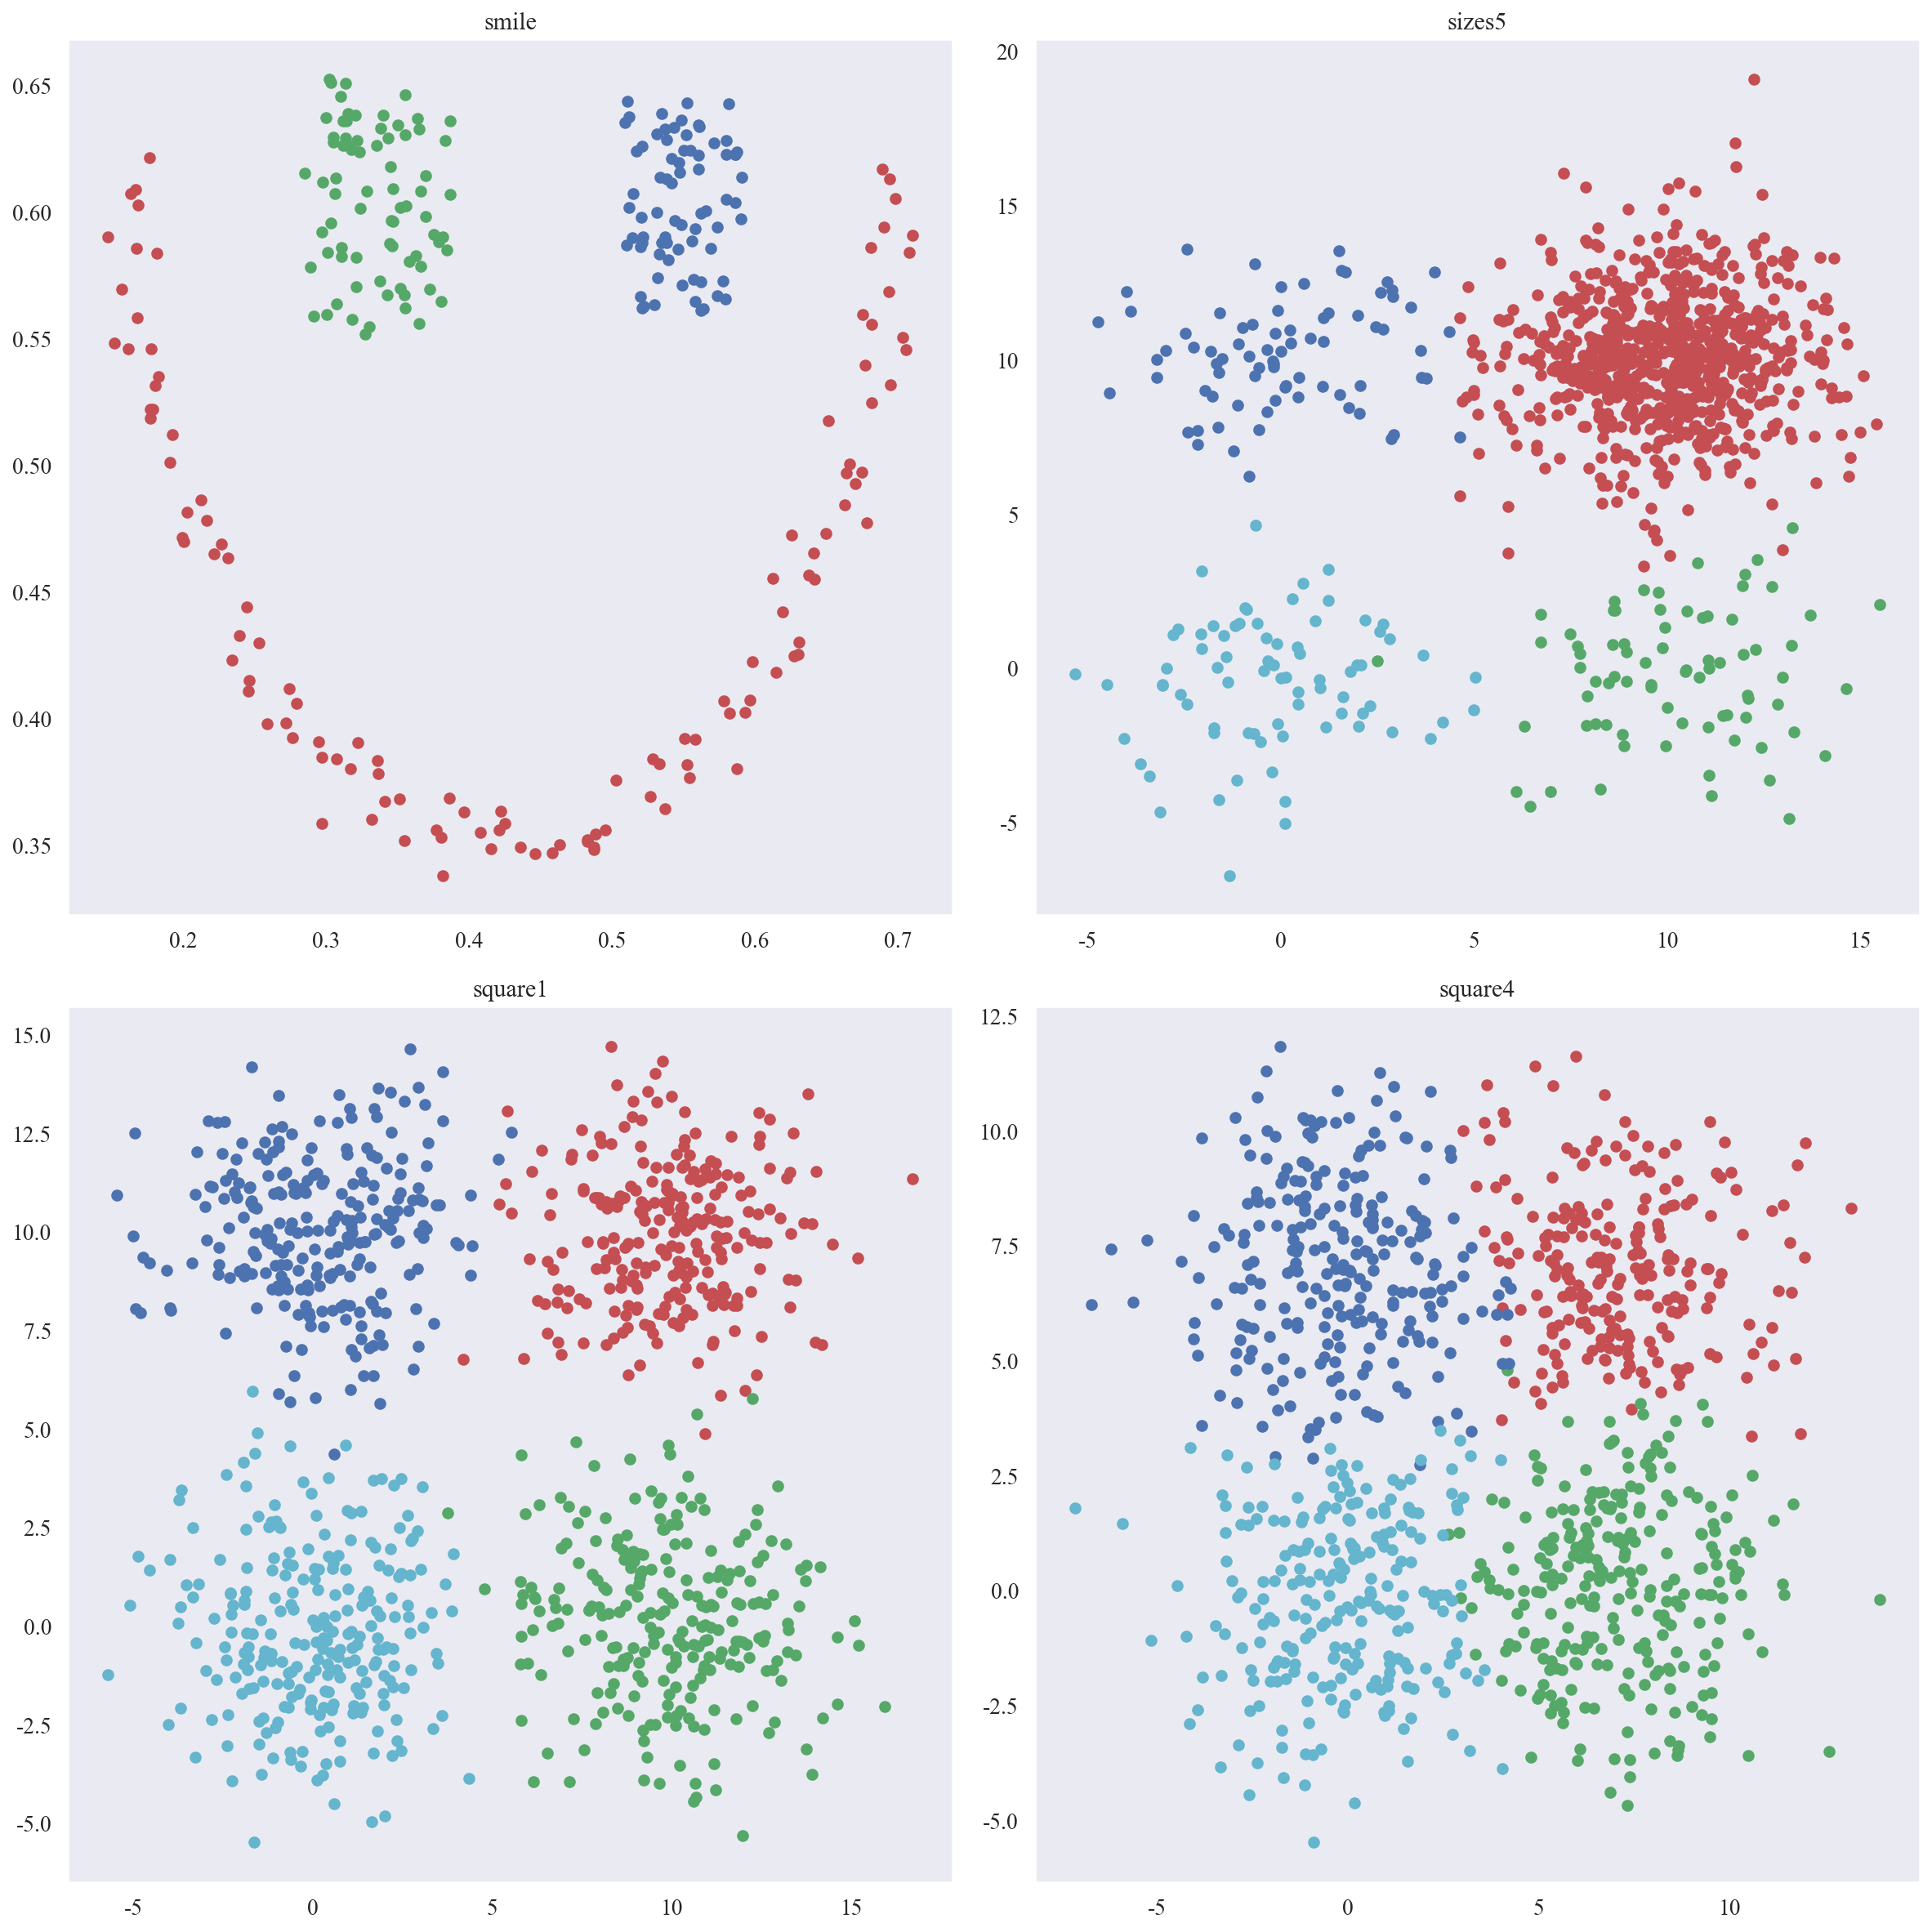

In [4]:
smile = pd.read_csv('./data/smile.csv')
sizes5 = pd.read_csv('./data/sizes5.csv')
square1 = pd.read_csv('./data/square1.csv')
square4 = pd.read_csv('./data/square4.csv')
smile = np.array(smile)
sizes5 = np.array(sizes5)
square1 = np.array(square1)
square4 = np.array(square4)

plt.figure(figsize=(16, 16), dpi=150)
plt.subplot(2, 2, 1)
show(smile), plt.title('smile')
plt.subplot(2, 2, 2)
show(sizes5), plt.title('sizes5')
plt.subplot(2, 2, 3)
show(square1), plt.title('square1')
plt.subplot(2, 2, 4)
show(square4), plt.title('square4')
plt.tight_layout()
# plt.savefig('./document/figure/data1.pdf')
plt.show()

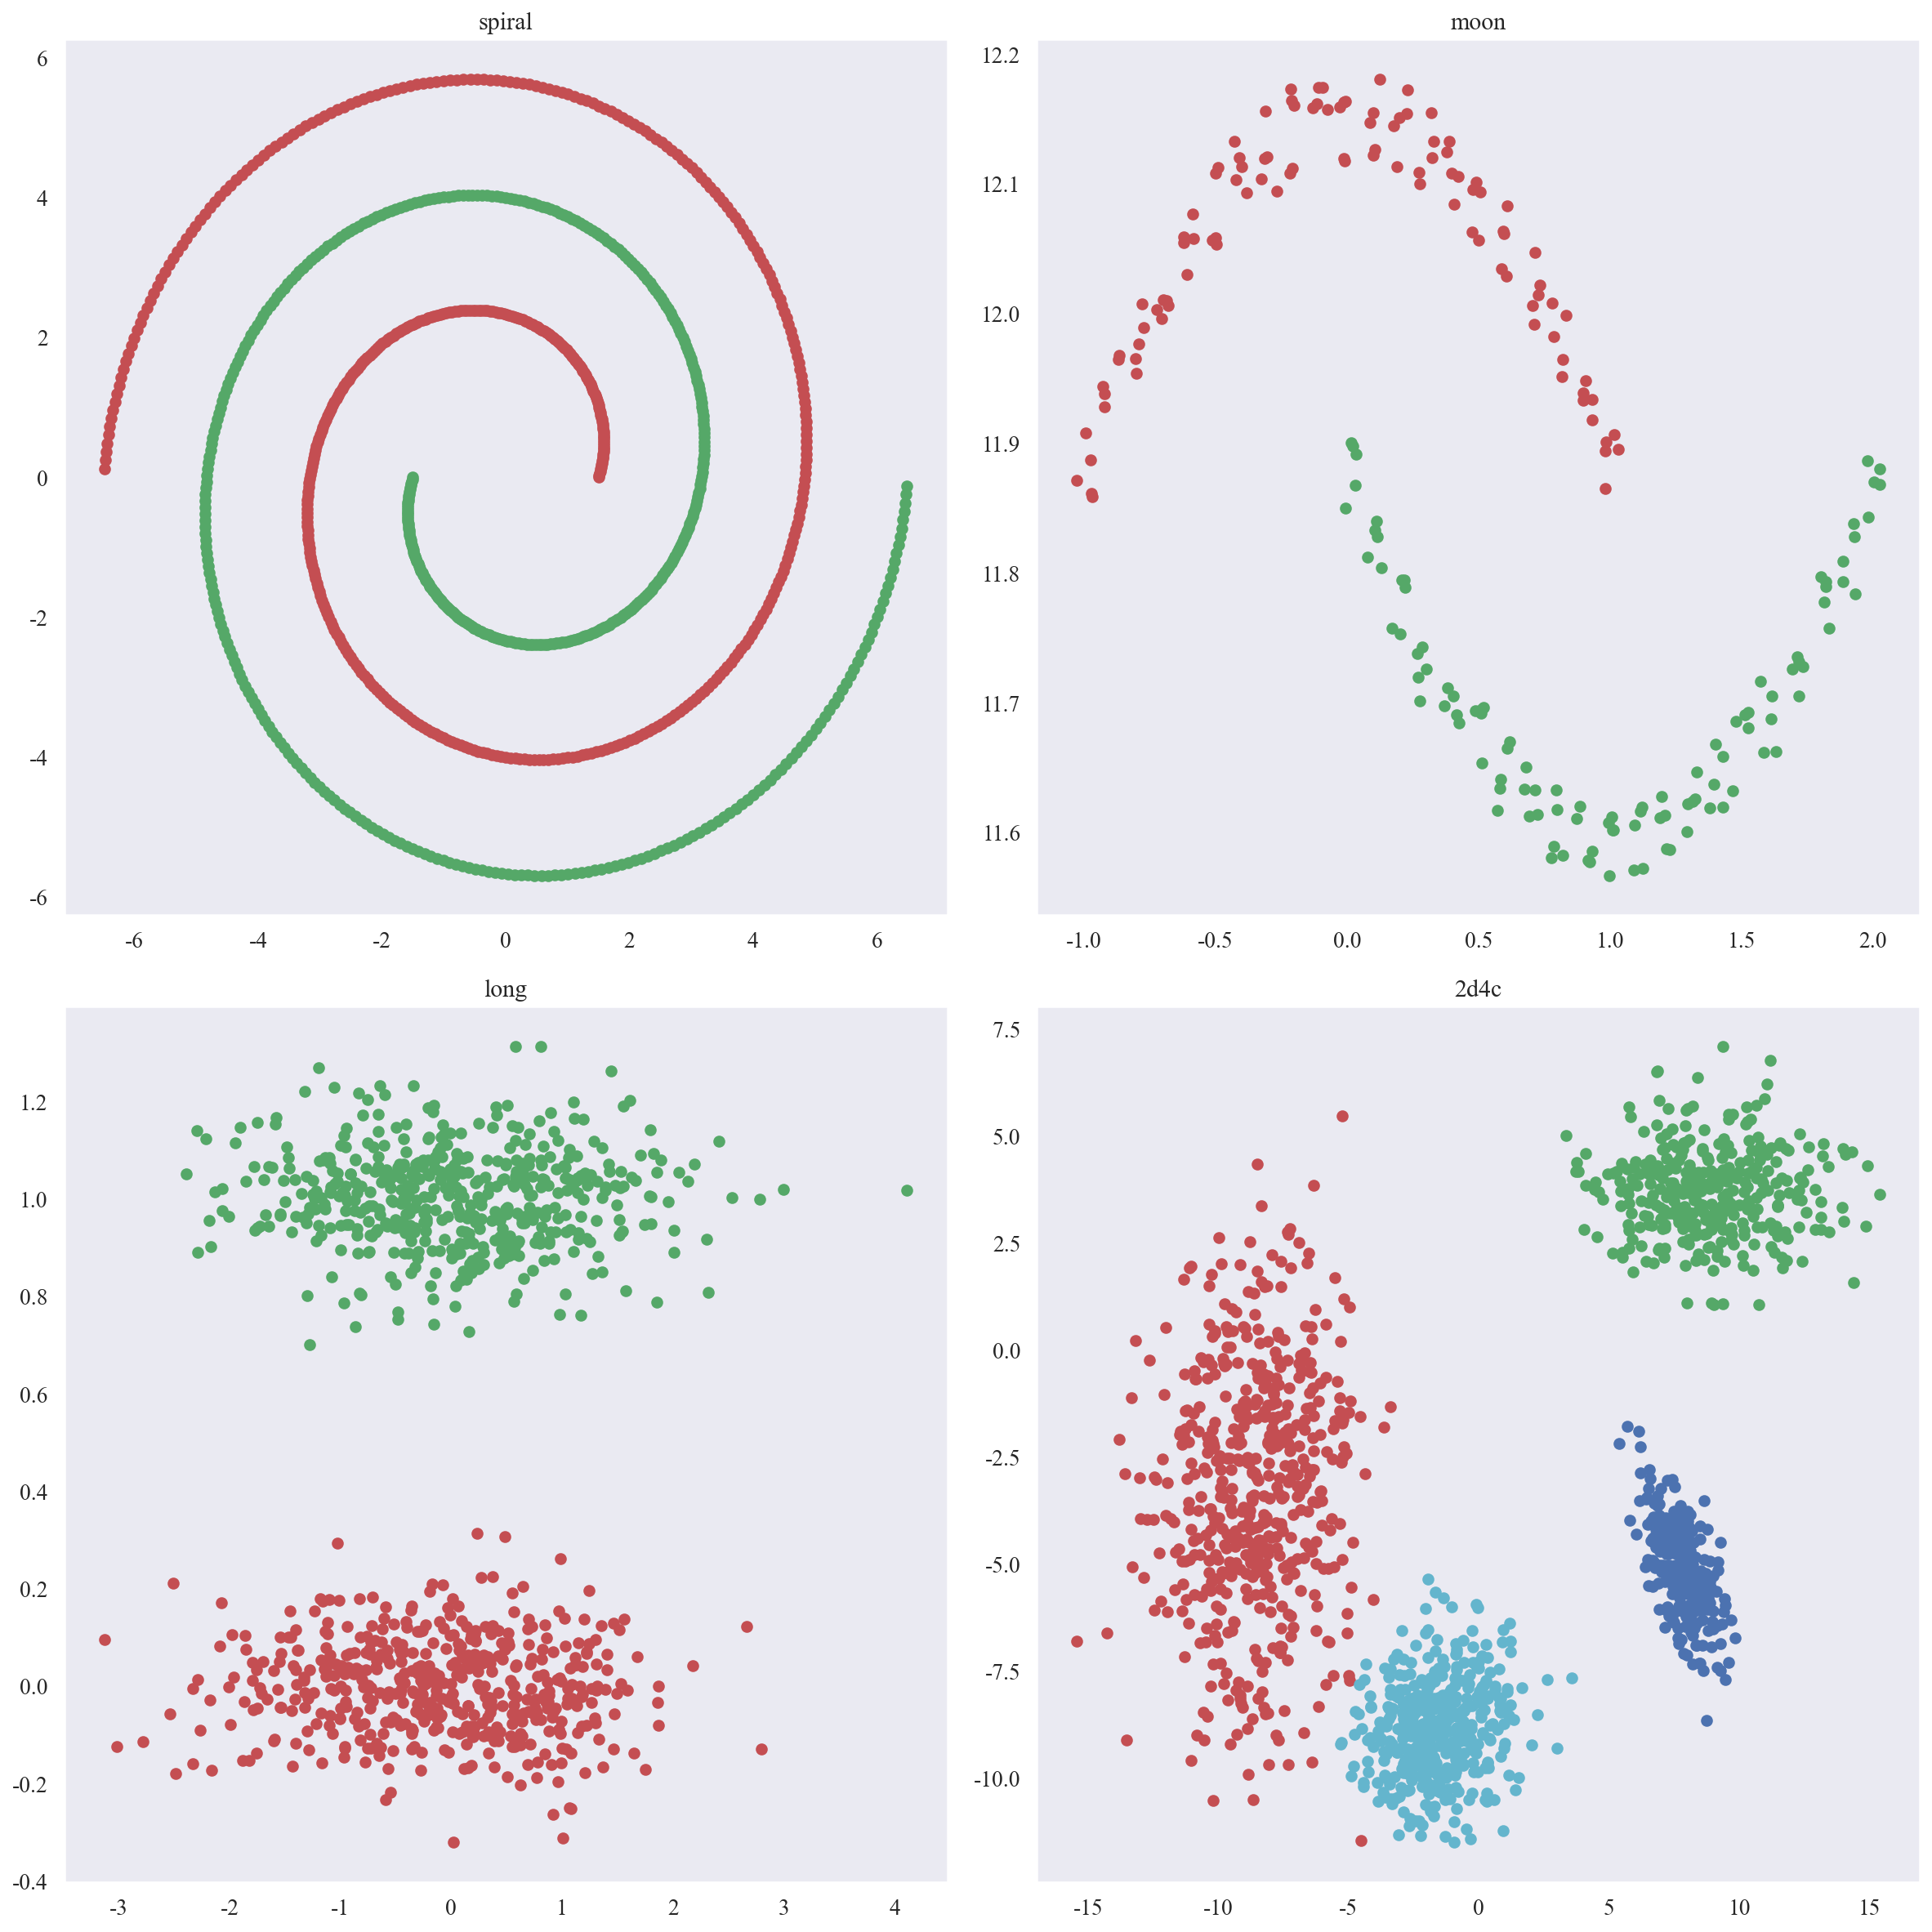

In [5]:
spiral = pd.read_csv('./data/spiral.csv')
moon = pd.read_csv('./data/moon.csv')
long = pd.read_csv('./data/long.csv')
c4d2 = pd.read_csv('./data/2d4c.csv')
spiral = np.array(spiral)
moon = np.array(moon)
long = np.array(long)
c4d2 = np.array(c4d2)

plt.figure(figsize=(16, 16), dpi=150)
plt.subplot(2, 2, 1)
show(spiral), plt.title('spiral')
plt.subplot(2, 2, 2)
show(moon), plt.title('moon')
plt.subplot(2, 2, 3)
show(long), plt.title('long')
plt.subplot(2, 2, 4)
show(c4d2), plt.title('2d4c')
plt.tight_layout()
# plt.savefig('./document/figure/data2.pdf')
plt.show()

## DBSCAN

In [6]:
r = 0.2
minpts = 5

def get_neighbours(p, data):
    l, d = data.shape
    N = []
    dis = np.apply_along_axis(sum,1,(np.tile(data[p],[l,1])-data)**2)
    r1 = np.tile(r,[l])
    dis = list(dis**0.5 - r1)
    for i in range(l):
        if dis[i] < 0:
            N.append(i)
    N.remove(p)
    return(N)

In [7]:
# 扩展当前核心对象 P 的所属簇
def expandcluster(p,data,c,species):
    if species[p] == 99: # unvisited
        visited = []
        #scan
        for i in range(len(species)):
            if species[i] != 99:
                visited.append(i)
        #expand
        n = get_neighbours(p,data)
        visited.append(p)
        if len(n) < minpts:
            species[p] = 0 #noise
        else:
            species[p] = c
            while len(n) != 0:
                i = get_neighbours(n[0],data)
                if len(i) < minpts:
                    if species[n[0]] == 99:
                        species[n[0]] = 0 #noise
                        visited.append(n[0])
                        n = set(n + i)
                        n = list(n - set(visited))
                else:
                    if species[n[0]] == 99:
                        species[n[0]] = c
                        visited.append(n[0])
                        n = set(n + i)
                        n = list(n - set(visited))                   
        
    return(species)

In [8]:
def dbscan(data_set):
    l, d = data_set.shape
    d -= 1
    #label（0 for noise）
    c = 0
    p = 0

    species = np.tile(99,[l])
    data = data_set[0:l,0:d]
    
    while p < len(data):
        c += 1
        species = expandcluster(p,data,c,species)
        p += 1
        
    return(species)

In [9]:
def data_cluster(data_set,species):
    l, d = data_set.shape
    d -= 1

    data = np.column_stack((data_set[0:l,0:d],species))

    return(data)

In [10]:
def show_cluster(dataSet, s):
    color = ['r', 'g', 'b', 'c', 'k', 'm', 'w', 'y']
    mark = ['.', 'o', '^', '1', '8', 's', 'p', '*', 'h', '+', 'D']
    for i in range(dataSet.shape[0]):
        plt.scatter(dataSet[i][0], dataSet[i][1], \
                    c=color[dataSet[s[i]][2].astype('int')])

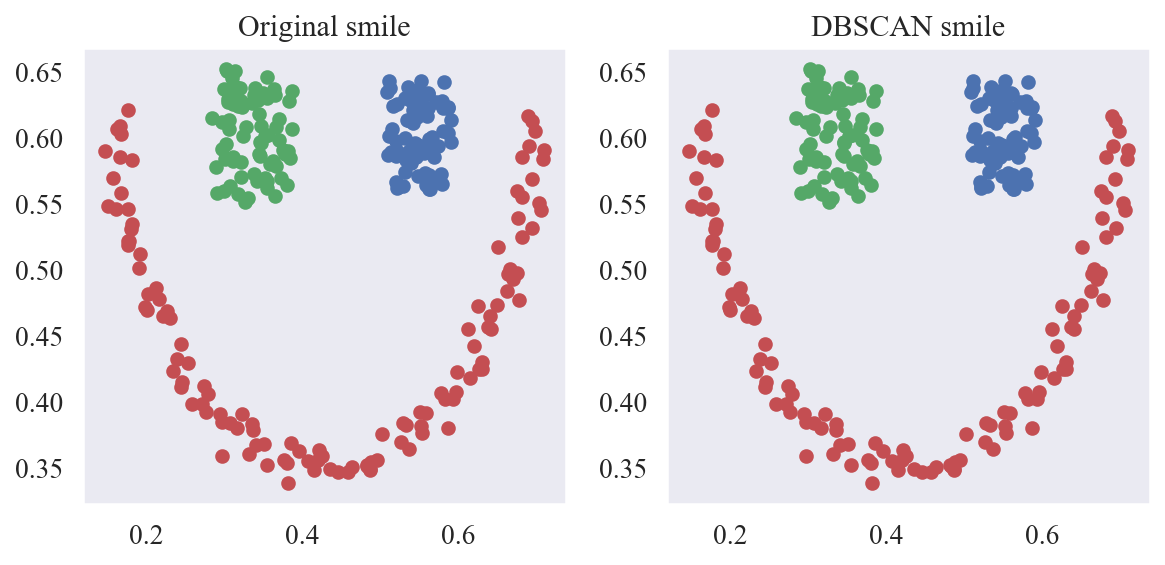

In [11]:
r = 0.05
minpts = 3
s1 = dbscan(smile)
plt.figure(figsize=(8, 4), dpi=150)
plt.subplot(1, 2, 1)
show(smile), plt.title('Original smile')
plt.subplot(1, 2, 2)
show_cluster(smile, s1), plt.title('DBSCAN smile')
plt.tight_layout()
# plt.savefig('./document/figure/smile.pdf')
plt.show()

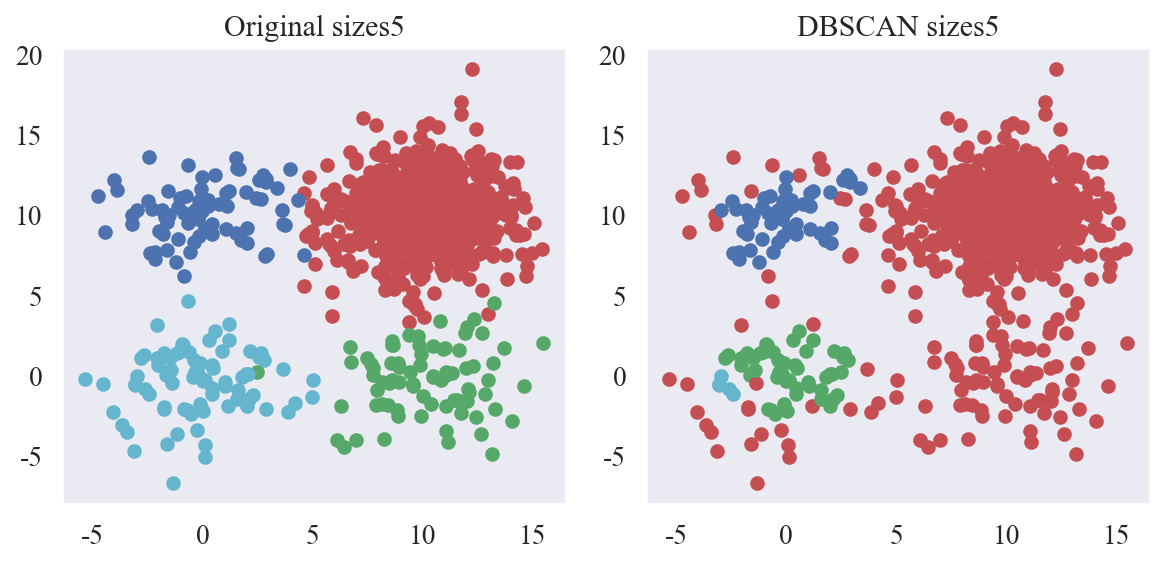

In [12]:
r = 1
minpts = 3
s2 = dbscan(sizes5)
plt.figure(figsize=(8, 4), dpi=150)
plt.subplot(1, 2, 1)
show(sizes5), plt.title('Original sizes5')
plt.subplot(1, 2, 2)
show_cluster(sizes5, s2), plt.title('DBSCAN sizes5')
plt.tight_layout()
# plt.savefig('./document/figure/sizes5.pdf')
plt.show()

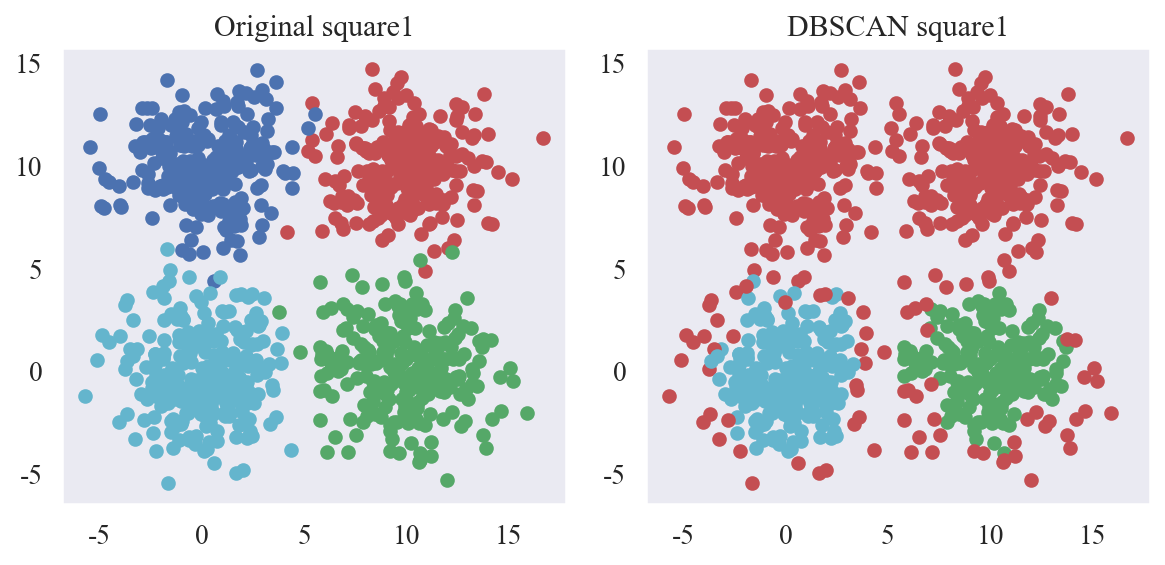

In [13]:
r = 1
minpts = 5
s3 = dbscan(square1)
plt.figure(figsize=(8, 4), dpi=150)
plt.subplot(1, 2, 1)
show(square1), plt.title('Original square1')
plt.subplot(1, 2, 2)
show_cluster(square1, s3), plt.title('DBSCAN square1')
plt.tight_layout()
# plt.savefig('./document/figure/square1.pdf')
plt.show()

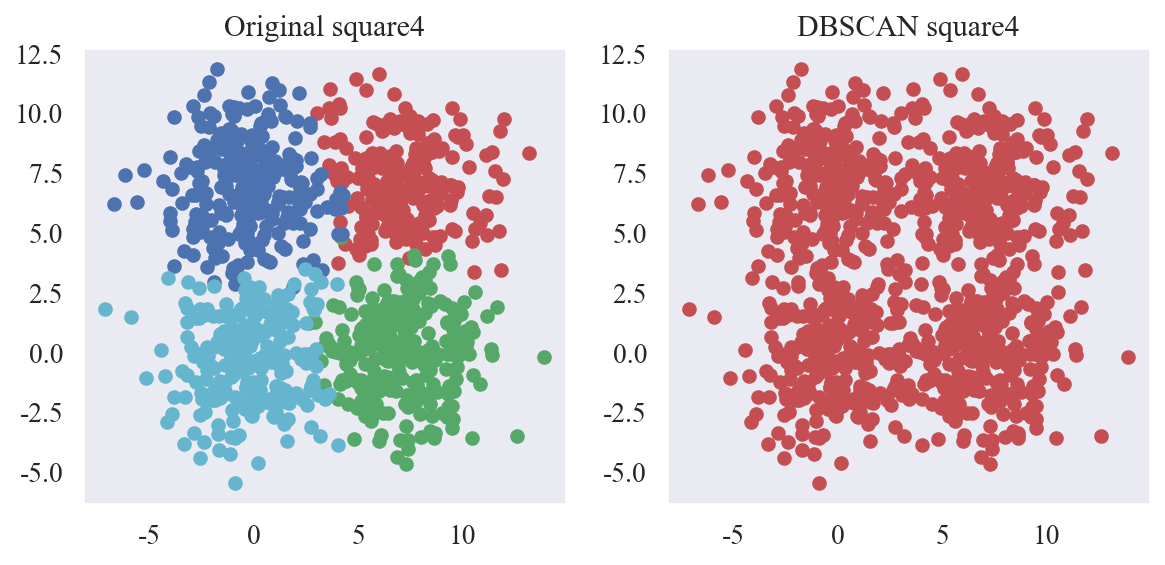

In [14]:
r = 1
minpts = 3
s4 = dbscan(square4)
plt.figure(figsize=(8, 4), dpi=150)
plt.subplot(1, 2, 1)
show(square4), plt.title('Original square4')
plt.subplot(1, 2, 2)
show_cluster(square4, s4), plt.title('DBSCAN square4')
plt.tight_layout()
# plt.savefig('./document/figure/square4.pdf')
plt.show()

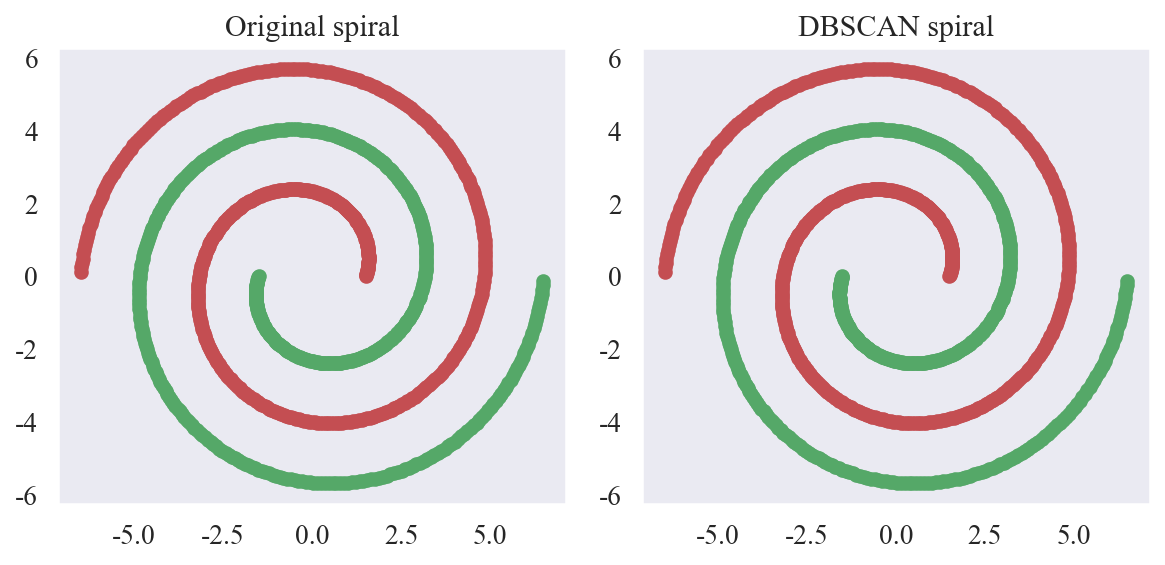

In [15]:
r = 1
minpts = 5
s5 = dbscan(spiral)
plt.figure(figsize=(8, 4), dpi=150)
plt.subplot(1, 2, 1)
show(spiral), plt.title('Original spiral')
plt.subplot(1, 2, 2)
show_cluster(spiral, s5), plt.title('DBSCAN spiral')
plt.tight_layout()
# plt.savefig('./document/figure/spiral.pdf')
plt.show()

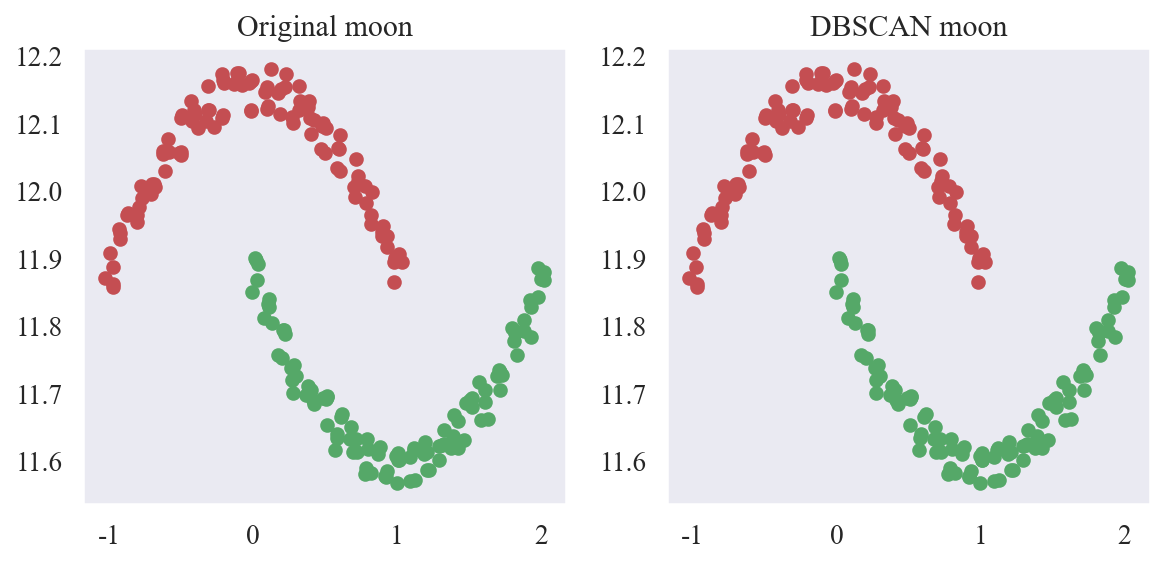

In [16]:
r = 0.2
minpts = 5
s6 = dbscan(moon)
plt.figure(figsize=(8, 4), dpi=150)
plt.subplot(1, 2, 1)
show(moon), plt.title('Original moon')
plt.subplot(1, 2, 2)
show_cluster(moon, s6), plt.title('DBSCAN moon')
plt.tight_layout()
# plt.savefig('./document/figure/moon.pdf')
plt.show()

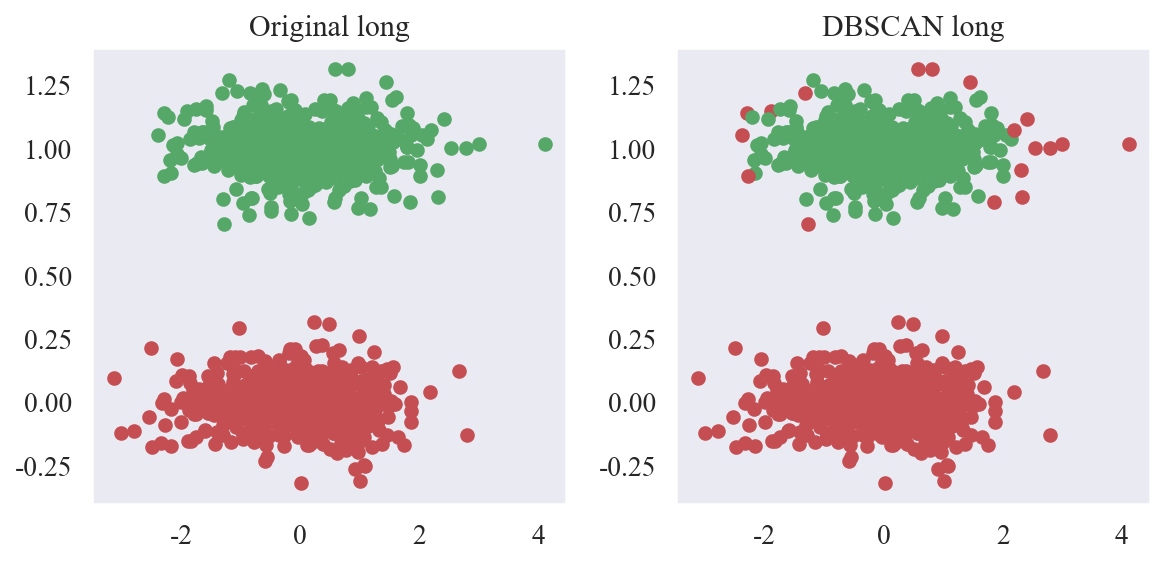

In [17]:
r = 0.2
minpts = 5
s7 = dbscan(long)
plt.figure(figsize=(8, 4), dpi=150)
plt.subplot(1, 2, 1)
show(long), plt.title('Original long')
plt.subplot(1, 2, 2)
show_cluster(long, s7), plt.title('DBSCAN long')
plt.tight_layout()
# plt.savefig('./document/figure/long.pdf')
plt.show()

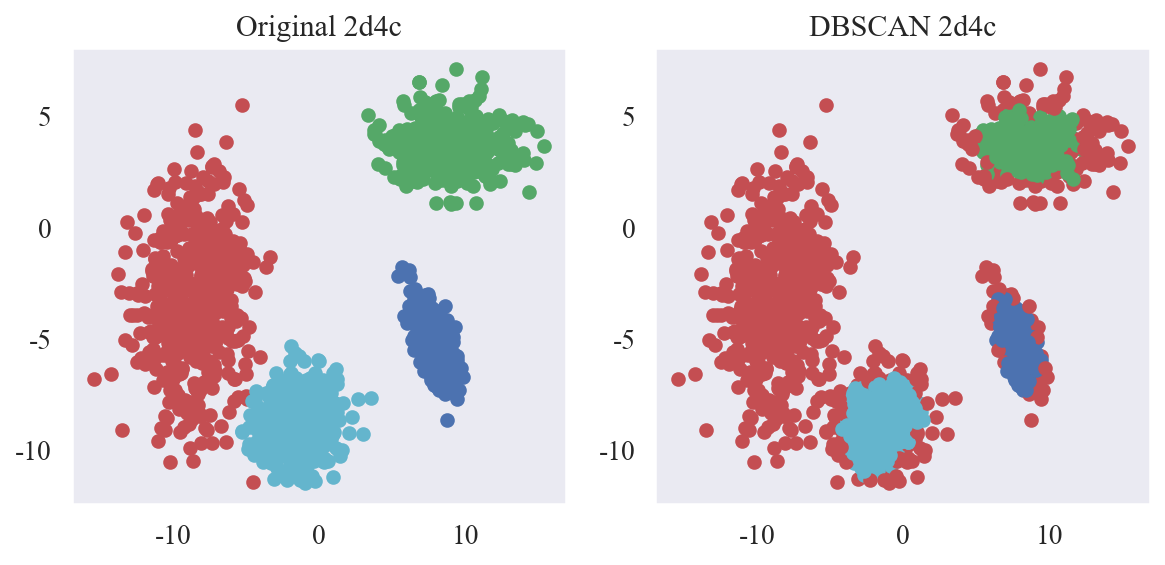

In [18]:
r = 0.5
minpts = 5
s8 = dbscan(c4d2)
plt.figure(figsize=(8, 4), dpi=150)
plt.subplot(1, 2, 1)
show(c4d2), plt.title('Original 2d4c')
plt.subplot(1, 2, 2)
show_cluster(c4d2, s8), plt.title('DBSCAN 2d4c')
plt.tight_layout()
# plt.savefig('./document/figure/c4d2.pdf')
plt.show()